In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numba import njit

In [2]:
@njit
def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, length)])

@njit
def CF(d, n):
    if np.sqrt(d) != np.floor(np.sqrt(d)):

        a = np.zeros(n)
        r = np.zeros(n)
        u = np.zeros(n)
        v = np.zeros(n)

        a[0] = int(np.floor(np.sqrt(d)))
        u[0] = a[0]
        v[0] = 1
        r[0] = (np.sqrt(d) - u[0])/v[0]

        for i in np.arange(1,n):
            a[i] = int(np.floor(1/r[i-1]))
            v[i] = int((d - u[i-1]*u[i-1])/v[i-1])
            u[i] = a[i]*v[i] - u[i-1]
            r[i] = (np.sqrt(d) - u[i])/v[i]

        return(a)
    
def GCD(x, y):
    while(y):
        x, y = y, x % y
    return abs(x)

In [11]:
CF(3, 20)

array([1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
       1., 2., 1.])

In [3]:
def CF_frac(a):
    h={}
    k={}
    h[-2]=0; h[-1]=1
    k[-2]=1; k[-1]=0

    for i in range(len(a)):
        h[i] = int(a[i])*h[i-1] + h[i-2]
        k[i] = int(a[i])*k[i-1] + k[i-2]
        
    return h,k

In [5]:
CF_frac(CF(3, 10))

({-2: 0,
  -1: 1,
  0: 1,
  1: 2,
  2: 5,
  3: 7,
  4: 19,
  5: 26,
  6: 71,
  7: 97,
  8: 265,
  9: 362},
 {-2: 1,
  -1: 0,
  0: 1,
  1: 1,
  2: 3,
  3: 4,
  4: 11,
  5: 15,
  6: 41,
  7: 56,
  8: 153,
  9: 209})

In [6]:
z = CF_frac(CF(3, 5))
z

({-2: 0, -1: 1, 0: 1, 1: 2, 2: 5, 3: 7, 4: 19},
 {-2: 1, -1: 0, 0: 1, 1: 1, 2: 3, 3: 4, 4: 11})

In [57]:
n = 1001
z = CF_frac(CF(2, n))

l =[]

for i in range(n):
    if len(str(z[0][i]))>len(str(z[1][i])):
        l.append(i)
        ##print(f"{i}:{z[0][i]}/{z[1][i]}")

In [58]:
len(l)

153

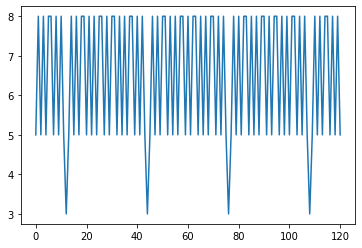

In [45]:
plt.plot(np.diff(l))